In [130]:

import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

Parameter containing:
tensor([[0.1148]], requires_grad=True)
Parameter containing:
tensor([-0.3540], requires_grad=True)


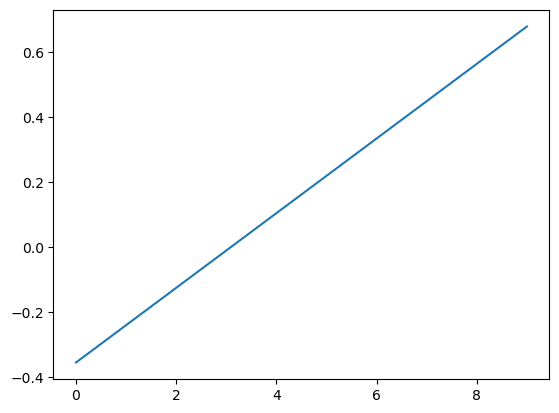

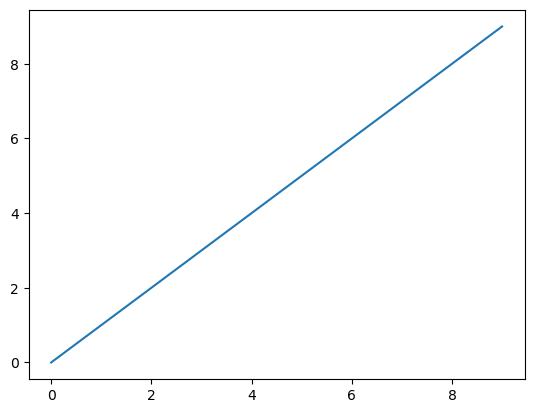

In [131]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)

print(f'{linear_model.weight}')
print(f'{linear_model.bias}')

batch = torch.arange(0,10, dtype=torch.float).unsqueeze(1)
res = linear_model(batch).detach().numpy()
plt.plot(res)
plt.show()

# with torch.no_grad():
linear_model.bias = nn.Parameter(torch.tensor([[0]], dtype=torch.float))
linear_model.weight = nn.Parameter(torch.tensor([[1]], dtype=torch.float))
batch = torch.arange(0,10, dtype=torch.float).unsqueeze(1)
res = linear_model(batch).detach().numpy()
plt.plot(res)
plt.show()

In [132]:
torch.set_printoptions(edgeitems=2, linewidth=75)
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [133]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 2,  8,  6,  3,  0,  7,  5,  9, 10]), tensor([4, 1]))

In [134]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [135]:
linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)
print(f'{linear_model.weight}')
print(f'{linear_model.bias}')
x = torch.ones(10, 1)
linear_model(x)

Parameter containing:
tensor([[-0.1628]], requires_grad=True)
Parameter containing:
tensor([0.0702], requires_grad=True)


tensor([[-0.0927],
        [-0.0927],
        [-0.0927],
        [-0.0927],
        [-0.0927],
        [-0.0927],
        [-0.0927],
        [-0.0927],
        [-0.0927],
        [-0.0927]], grad_fn=<AddmmBackward0>)

In [136]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.8934]], requires_grad=True),
 Parameter containing:
 tensor([0.7187], requires_grad=True)]

In [137]:

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [138]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 244.4088, Validation loss 207.6118
Epoch 1000, Training loss 3.5564, Validation loss 2.7262
Epoch 2000, Training loss 2.9868, Validation loss 2.7311
Epoch 3000, Training loss 2.9779, Validation loss 2.7318

Parameter containing:
tensor([[5.3752]], requires_grad=True)
Parameter containing:
tensor([-17.2707], requires_grad=True)


In [139]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 306.8846, Validation loss 274.4659
Epoch 1000, Training loss 3.5370, Validation loss 2.7262
Epoch 2000, Training loss 2.9865, Validation loss 2.7311
Epoch 3000, Training loss 2.9779, Validation loss 2.7318

Parameter containing:
tensor([[5.3753]], requires_grad=True)
Parameter containing:
tensor([-17.2713], requires_grad=True)


In [140]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [141]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [142]:
from collections import OrderedDict

hidden_neurons = 8

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_neurons)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_neurons, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [143]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 189.8928, Validation loss 152.9444
Epoch 1000, Training loss 4.9558, Validation loss 2.8843
Epoch 2000, Training loss 3.3493, Validation loss 5.1546
Epoch 3000, Training loss 1.8548, Validation loss 3.7605
Epoch 4000, Training loss 1.5774, Validation loss 3.3283
Epoch 5000, Training loss 1.5215, Validation loss 3.2519
output tensor([[11.9470],
        [11.6759]], grad_fn=<AddmmBackward0>)
answer tensor([[11.],
        [14.]])
hidden tensor([[-0.0264],
        [-1.0572],
        [ 0.0110],
        [ 0.0349],
        [-0.5331],
        [ 1.0106],
        [-0.9491],
        [-0.0779]])


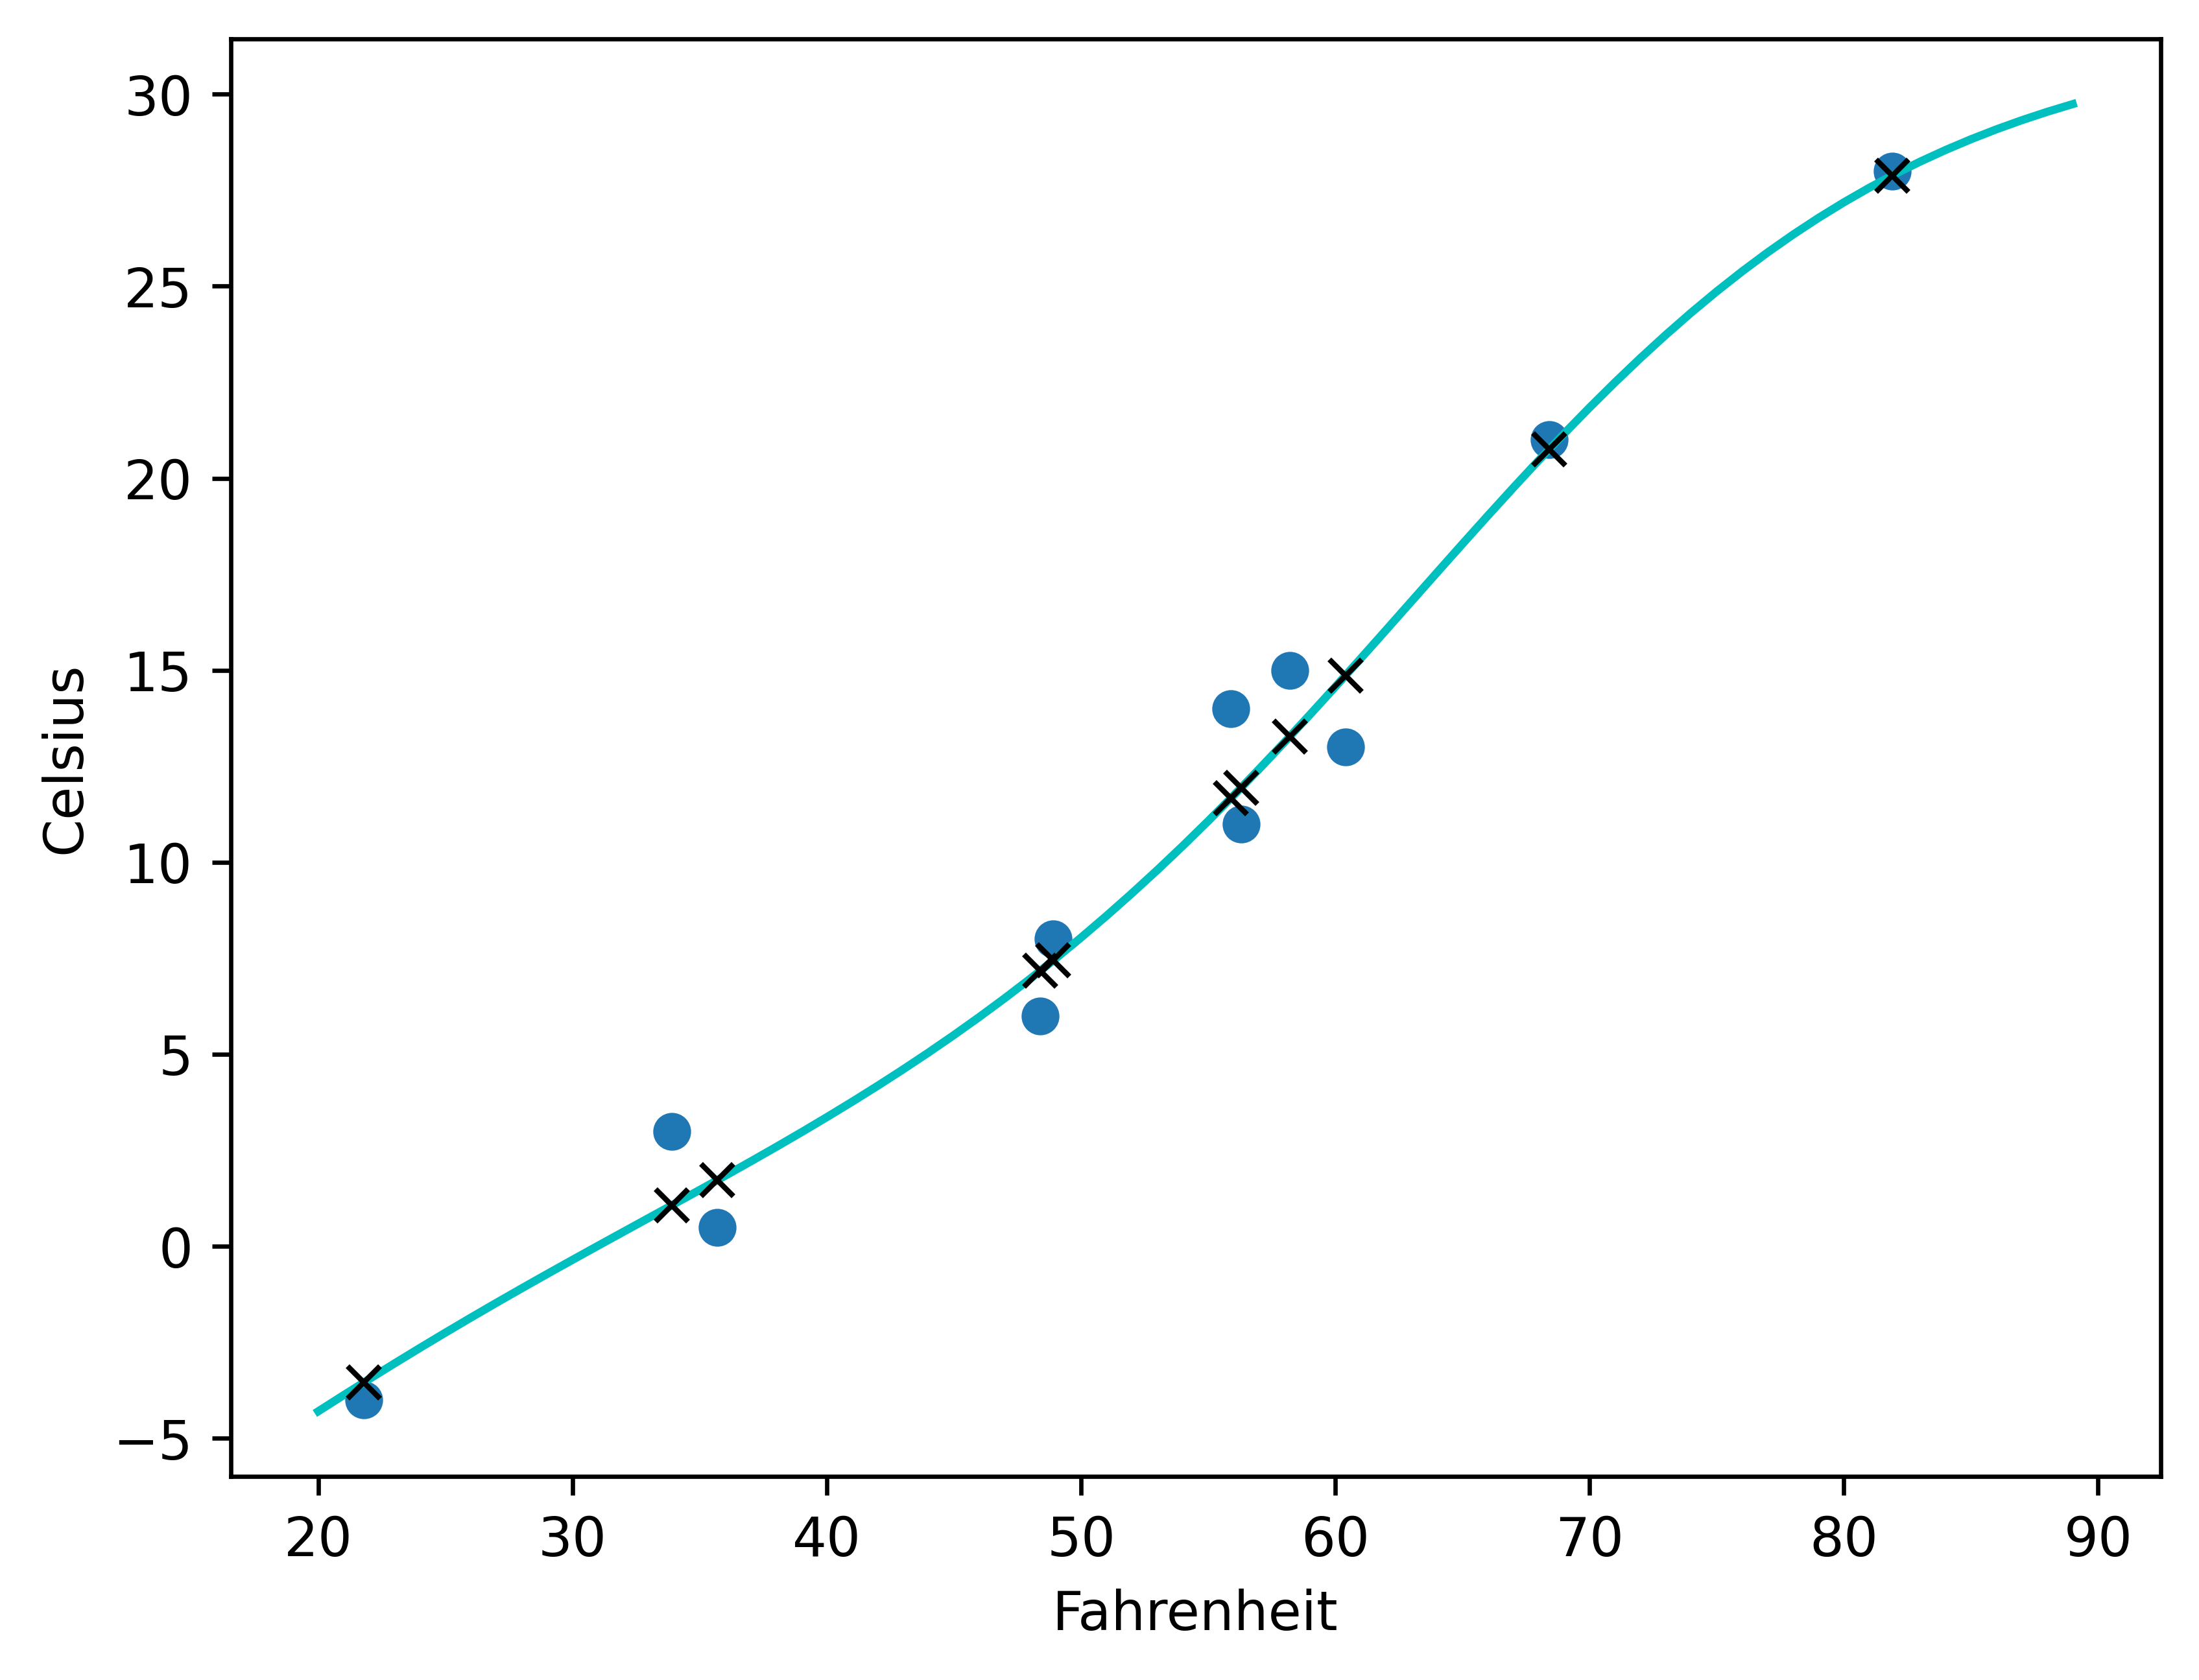

In [144]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Epoch 1, Training loss 174.5229, Validation loss 134.3341
Epoch 1000, Training loss 23.0892, Validation loss 2.5099
Epoch 2000, Training loss 14.2988, Validation loss 9.1411
Epoch 3000, Training loss 12.4818, Validation loss 13.2105
Epoch 4000, Training loss 11.4878, Validation loss 15.7386
Epoch 5000, Training loss 11.2043, Validation loss 17.7129


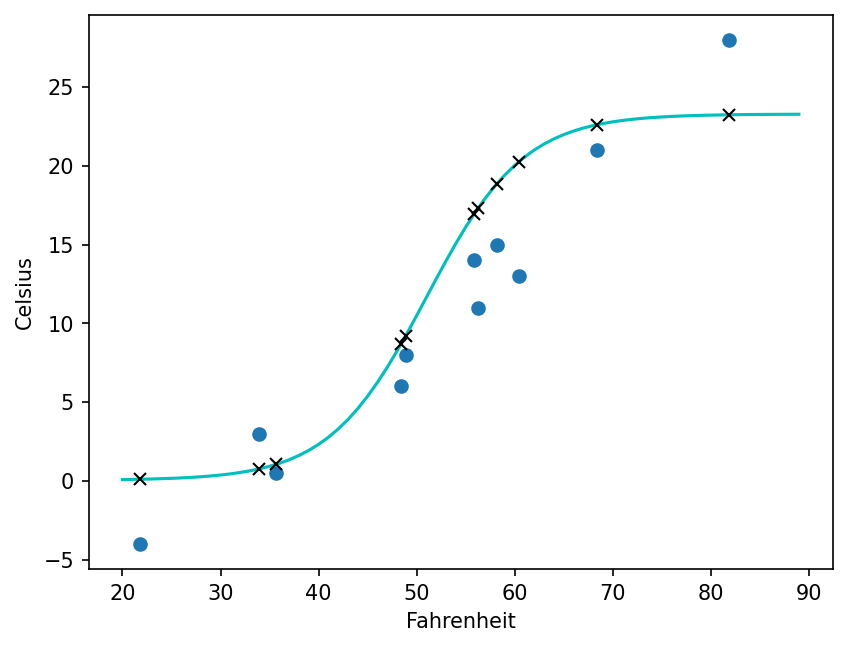

In [150]:
# Aufgabe: Experimentieren Sie mit der Anzahl der versteckten Neuronen und der Lernrate. 
#   Welche Änderungen erzeugen ein lineares Ausgangsverhalten?

hidden_neurons = 1
lr = 1e-3

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_neurons)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_neurons, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Lineares Ausgangsverhalten: 
    Lässt sich erzeugen, wenn man lediglich ein verstecktes Neuron verwendet, weil dann nur eine lineare Beziehung zwischen der Eingabe und der Ausgabe erstellt werden kann. Das wird begünstigt, wenn eine niedrige Lernrate verwendet wird. Da in diesem Beispiel auch noch die Aktivierungsfunktion angwendet wird, ist lediglich deren Verlauf hier zu sehen.

Epoch 1, Training loss 196.9706, Validation loss 161.8126
Epoch 1000, Training loss 165.8189, Validation loss 123.6263
Epoch 2000, Training loss 142.8906, Validation loss 95.0204
Epoch 3000, Training loss 126.0099, Validation loss 73.5463
Epoch 4000, Training loss 113.5641, Validation loss 57.3763
Epoch 5000, Training loss 104.3715, Validation loss 45.1622


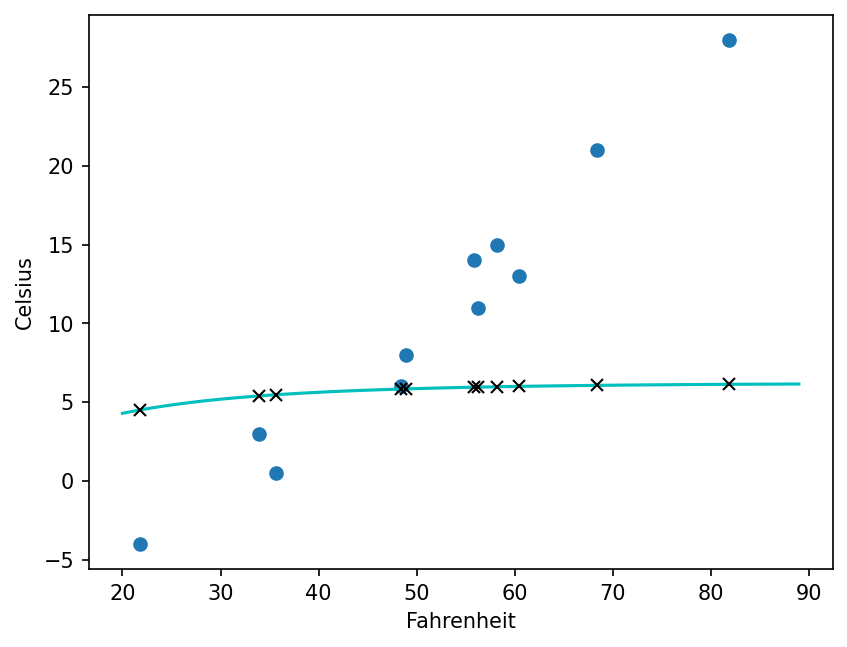

In [151]:
# Aufgabe: Experimentieren Sie mit der Anzahl der versteckten Neuronen und der Lernrate. 
#   Welche Änderungen führen zu starkem “Overfitting”?


hidden_neurons = 100
lr = 1e-6

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, hidden_neurons)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(hidden_neurons, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Overfitting: Um Overfitting, also die Überanpassung an die Trainingsdaten zu erreichen werden viele versteckte Neurone genutzt um ein genaues Training zu erreichen. Zudem wird eine hohe Lernrate verwendet, um Overfitting zu erreichen. Hier wird das Modell dann möglicherweise zu komplex und zu genau an die Trainingsdaten angepasst, sodass es zu Overfitting kommen kann.